
# <p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>Gender recognition  by voice </p>  


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# read file
voice=pd.read_csv('../voice/voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [2]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [3]:
print("Le nombre de features:" ,voice.columns.shape[0])

Le nombre de features: 21


In [4]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Preprocessing: label encoder and normalization

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [6]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


In [7]:
voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

# Number of male and female

In [8]:
print("Number of male: {}".format(voice[voice.label == 1].shape[0]))
print("Number of female: {}".format(voice[voice.label == 0].shape[0]))

Number of male: 1584
Number of female: 1584


# Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm
import xgboost

In [11]:
# Split the data
train, test = train_test_split(voice,test_size=0.2,random_state = 42)

In [12]:
train.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [13]:
test.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [14]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
807,0.665832,0.365315,0.713283,0.573272,0.739741,0.239920,0.038499,0.002166,0.737625,0.444370,...,0.665832,0.421330,0.191643,0.999749,0.325694,0.040860,0.189421,0.188841,0.137621,1.0
2495,0.690781,0.481685,0.771153,0.751818,0.783035,0.096267,0.074903,0.006989,0.656182,0.545160,...,0.690781,0.660556,0.197966,0.981526,0.362681,0.040860,0.275197,0.274678,0.092973,0.0
2529,0.777030,0.284782,0.762816,0.719151,0.853189,0.198279,0.060899,0.006434,0.657650,0.398946,...,0.777030,0.626416,0.193074,0.972570,0.426227,0.040860,0.390994,0.390558,0.090246,0.0
2241,0.360908,0.647398,0.364524,0.153347,0.651711,0.591160,0.042757,0.003466,0.920187,0.880825,...,0.360908,0.798285,0.339949,0.880415,0.150666,0.006452,0.071837,0.071888,0.269133,0.0
2981,0.663608,0.510232,0.607877,0.554451,0.884850,0.400236,0.056819,0.004560,0.796302,0.637855,...,0.663608,0.445410,0.124150,0.992409,0.324128,0.086022,0.182586,0.181062,0.280772,0.0


In [15]:
train.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 807 to 860
Data columns (total 21 columns):
meanfreq    2534 non-null float64
sd          2534 non-null float64
median      2534 non-null float64
Q25         2534 non-null float64
Q75         2534 non-null float64
IQR         2534 non-null float64
skew        2534 non-null float64
kurt        2534 non-null float64
sp.ent      2534 non-null float64
sfm         2534 non-null float64
mode        2534 non-null float64
centroid    2534 non-null float64
meanfun     2534 non-null float64
minfun      2534 non-null float64
maxfun      2534 non-null float64
meandom     2534 non-null float64
mindom      2534 non-null float64
maxdom      2534 non-null float64
dfrange     2534 non-null float64
modindx     2534 non-null float64
label       2534 non-null float64
dtypes: float64(21)
memory usage: 435.5 KB


# The number of male and female for train data-set

In [17]:
print("Number of male: {}".format(train[train.label == 1].shape[0]))
print("Number of female: {}".format(train[train.label == 0].shape[0]))

Number of male: 1247
Number of female: 1287


# The number of male and female for test data-set

In [18]:
print("Number of male: {}".format(test[test.label == 1].shape[0]))
print("Number of female: {}".format(test[test.label == 0].shape[0]))

Number of male: 337
Number of female: 297


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 2148 to 2594
Data columns (total 21 columns):
meanfreq    634 non-null float64
sd          634 non-null float64
median      634 non-null float64
Q25         634 non-null float64
Q75         634 non-null float64
IQR         634 non-null float64
skew        634 non-null float64
kurt        634 non-null float64
sp.ent      634 non-null float64
sfm         634 non-null float64
mode        634 non-null float64
centroid    634 non-null float64
meanfun     634 non-null float64
minfun      634 non-null float64
maxfun      634 non-null float64
meandom     634 non-null float64
mindom      634 non-null float64
maxdom      634 non-null float64
dfrange     634 non-null float64
modindx     634 non-null float64
label       634 non-null float64
dtypes: float64(21)
memory usage: 109.0 KB


In [20]:
print("Le nombre de features pour le train:" ,train.columns.shape[0])
print("Le nombre de features pour le test:" ,test.columns.shape[0])

Le nombre de features pour le train: 21
Le nombre de features pour le test: 21


In [21]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [22]:
## define and compile model 
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()
model.add(Dense(100, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [23]:
#Evaluate the modele
train_acc = model.evaluate(x_train, y_train, verbose=0)
test_acc = model.evaluate(x_test, y_test, verbose=0)
print("the accuracy of train is :", train_acc)
print("the accuracy of test is :", test_acc)

the accuracy of train is : [0.723877737864605, 0.22415153682231903]
the accuracy of test is : [0.7254880429818427, 0.21608832478523254]


## K-Nearest Neighbors
Using neighbors.KNeighborsClassifier() to build the model.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 3: {}".format(knn.score(x_test,y_test)))
#Confusion Matrix
y_pred = knn.predict(x_test)

Score for Number of Neighbors = 3: 0.9810725552050473


Lowest error is 0.015772870662460567 occurs at k=8.


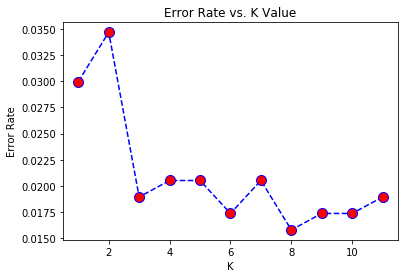

In [25]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]
k=knn_error(12,x_train,y_train,x_test,y_test)

<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">GridSearchCV For KNN regression  <br><br></p>

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
best_knn = KNeighborsClassifier()

grid = GridSearchCV(best_knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)

#print(grid.grid_scores_)
'''
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)
'''

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9775059194948698
{'n_neighbors': 8, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')


In [27]:
knn_best = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance').fit(x_train,y_train)
predictions_test = knn_best.predict(x_test)
predictions_train = knn_best.predict(x_train)
test_accuracy = print("accuracy score for test KNN :" ,accuracy_score(y_true = y_test, y_pred = predictions_test))
train_accuracy = print("accuracy score for train KNN :" ,accuracy_score(y_true = y_train, y_pred = predictions_train))

accuracy score for test KNN : 0.9810725552050473
accuracy score for train KNN : 1.0


## Random Forest
Using ensemble.RandomForestClassifier() to build the model.

In [28]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))




Random Forest Classification Score:  0.9842271293375394


In [29]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [30]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
print("Random Forest Classification Score test: ",rfc1.score(x_test,y_test))
print("Random Forest Classification Score train : ",rfc1.score(x_train,y_train))

Random Forest Classification Score test:  0.9842271293375394
Random Forest Classification Score train :  0.9992107340173638


## XgBoost
Using xgboost.XGBClassifier() to build the model.

In [31]:
from sklearn import metrics
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np


# xgboost model
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(x_train, y_train)
y_pred = gbm.predict(x_test)

# Test Accuracy (xgboost)
print("XGBoost Classification Score: ",gbm.score(x_test,y_test))

XGBoost Classification Score:  0.9826498422712934


<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">GridSearchCV For XGBoost  <br><br></p>

In [32]:
#tester avec des autres parametres
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [33]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [34]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [35]:
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   32.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  5.0min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

<p style="font-family: Arial; font-size:1.25em;color:blue; font-style:bold">Accuracy score with the hyper parameters  <br><br></p> 

In [36]:
best_xgb= xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)
xgb_fit=best_xgb.fit(x_train,y_train)
predictions_test = xgb_fit.predict(x_test)

print("XGBoost Classification Score test: ",best_xgb.score(x_test,y_test))
print("XGBoost Classification Score train: ",best_xgb.score(x_train,y_train))

XGBoost Classification Score test:  0.9842271293375394
XGBoost Classification Score train:  1.0


## SVM regression


In [37]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))


C:\Users\Utilisateur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Classification Score is: 0.9794952681388013


<p style="font-family: Arial; font-size:1.5em;color:purple; font-style:bold">GridSearchCV For SVM regression  <br><br></p>

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}  
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(x_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

C:\Users\Utilisateur\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.962, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.963, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.961, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.886, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.901, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.900, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.660, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.660, total=   0.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.685, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.508, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.973, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.973, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.978, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.975, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.972, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.976, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.980, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   12.4s finished


<p style="font-family: Arial; font-size:1.25em;color:blue; font-style:bold">accuracy score for SVM regression with hyper parameters <br><br></p>

In [39]:
from sklearn.svm import SVC
best_SVM=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False).fit(x_train,y_train)
svc_predict=best_SVM.predict(x_test)

accuracy_score(y_true = y_test, y_pred = svc_predict)
print("SVM Classification Score train : ",best_SVM.score(x_train,y_train))
print("SVM Classification Score test : ",best_SVM.score(x_test,y_test))

SVM Classification Score train :  0.9901341752170482
SVM Classification Score test :  0.9810725552050473


Comparative table of accuracy score(test and train) for the best algorithm after using grid-search

In [40]:
leaderboard1 = pd.DataFrame({'accuracy score test ':[knn_best.score(x_test,y_test),best_SVM.score(x_test,y_test),best_xgb.score(x_test,y_test),rfc1.score(x_test,y_test)],'accuracy score train':[knn_best.score(x_train,y_train),best_SVM.score(x_train,y_train),best_xgb.score(x_train,y_train),rfc1.score(x_train,y_train)]}, 
                            index = ['KNN regression', 'SVM regression','XGBoost regression','Random Forest'])
leaderboard1

,accuracy score test,accuracy score train
KNN regression,0.981073,1.000000
SVM regression,0.981073,0.990134
XGBoost regression,0.984227,1.000000
Random Forest,0.984227,0.999211


# Voting classification

In [41]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[
      ('knn', knn_best), ('random', rand_forest), ('xgboost', best_xgb)], voting='hard')
eclf1 = eclf1.fit(x_train, y_train)
print("voting Classification Score test : ",eclf1.score(x_test,y_test))
print("voting Classification Score train : ",eclf1.score(x_train,y_train))

voting Classification Score test :  0.9873817034700315
voting Classification Score train :  1.0


# Precision and recall


In [42]:
#for y_test data with all features
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Activation, Dense
models = Sequential()
models.add(Dense(100, input_dim=20, activation='relu'))
models.add(Dense(1, activation='sigmoid'))
models.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# predict probabilities for test set
yhat_probs = models.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = models.predict_classes(x_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.452681
Precision: 0.343750
Recall: 0.032641
F1 score: 0.059621


# Choice of features using  correlation matrix


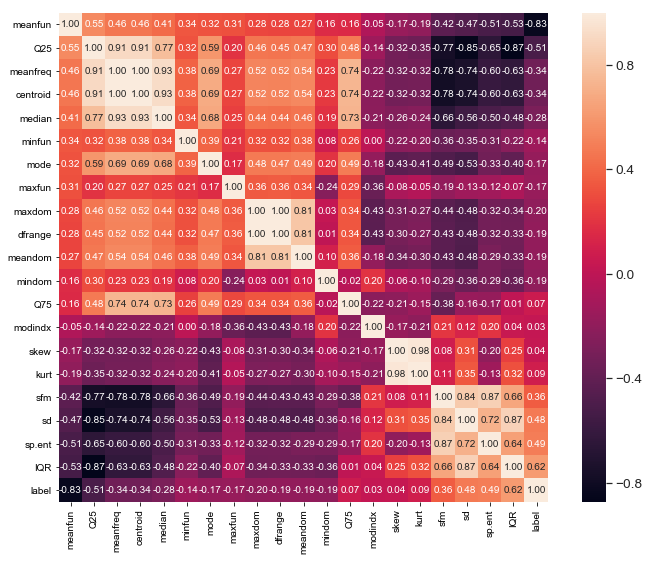

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = voice.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 21 #number of variables for heatmap
cols = corrmat.nlargest(k, 'meanfun')['meanfun'].index
cm = np.corrcoef(voice[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [46]:
features = ['meanfreq','median','Q25','Q75','skew','kurt','mode','centroid','meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','label']

In [47]:
X = voice[features]
Train, Test = train_test_split(X,test_size=0.2,random_state = 42)

In [48]:
print("Number of male: {}".format(Test[Test.label == 1].shape[0]))
print("Number of female: {}".format(Test[Test.label == 0].shape[0]))

Number of male: 337
Number of female: 297


In [128]:
x_Train = Train.iloc[:, :-1]
y_Train = Train["label"]
x_Test = Test.iloc[:, :-1]
y_Test = Test["label"]

In [129]:
knn_best_X = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance').fit(x_Train,y_Train)
predictions = knn_best_X.predict(x_Test)

accuracy_score(y_true = y_Test, y_pred = predictions)
print("KNN Classification Score test : ",knn_best_X.score(x_Test,y_Test))
print("KNN Classification Score train: ",knn_best_X.score(x_Train,y_Train))


KNN Classification Score test :  0.9858044164037855
KNN Classification Score train:  1.0


In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc1_X=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
rfc1_X.fit(x_Train, y_Train)
pred=rfc1_X.predict(x_Test)

print("Random Forest Classification Score test: ",rfc1_X.score(x_Test,y_Test))
print("Random Forest Classification Score train: ",rfc1_X.score(x_Train,y_Train))

Random Forest Classification Score test:  0.9810725552050473
Random Forest Classification Score train:  0.9956590370955012


In [131]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
best_xgb_X= xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)
xgb_fit=best_xgb_X.fit(x_Train,y_Train)
predictions = xgb_fit.predict(x_Test)

print("XGBoost Classification Score test:" ,accuracy_score(y_true = y_Test, y_pred = predictions))
print("XGBoost Classification Score train: ",rfc1_X.score(x_Train,y_Train))

XGBoost Classification Score test: 0.9826498422712934
XGBoost Classification Score train:  0.9956590370955012


In [132]:
from sklearn.svm import SVC
best_SVM_X=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False).fit(x_Train,y_Train)
svc_predict=best_SVM_X.predict(x_Test)

accuracy_score(y_true = y_Test, y_pred = svc_predict)
print("SVM Classification Score train: ",best_SVM_X.score(x_Train,y_Train))
print("SVM Classification Score test: ",best_SVM_X.score(x_Test,y_Test))

SVM Classification Score train:  0.984214680347277
SVM Classification Score test:  0.9810725552050473


In [146]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[
      ('knn', knn_best_X), ('random', rfc1_X), ('xgboost', best_xgb_X)], voting='hard')
eclf1 = eclf1.fit(x_Train, y_Train)
print("voting Classification Score test : ",eclf1.score(x_Test,y_Test))
print("voting Classification Score train : ",eclf1.score(x_Train,y_Train))

voting Classification Score test :  0.9858044164037855
voting Classification Score train :  0.9988161010260458


In [147]:
leaderboard2 = pd.DataFrame({'accuracy score test ':[knn_best_X.score(x_Test,y_Test),best_SVM_X.score(x_Test,y_Test),best_xgb_X.score(x_Test,y_Test),rfc1_X.score(x_Test,y_Test),eclf1.score(x_Test,y_Test)],'accuracy score train':[knn_best_X.score(x_Train,y_Train),best_SVM_X.score(x_Train,y_Train),best_xgb_X.score(x_Train,y_Train),rfc1_X.score(x_Train,y_Train),eclf1.score(x_Train,y_Train)]}, 
                            index = ['KNN ', 'SVM ','XGBoost ','Random Forest','voting'])
leaderboard2

,accuracy score test,accuracy score train
KNN,0.985804,1.000000
SVM,0.981073,0.984215
XGBoost,0.982650,0.998421
Random Forest,0.981073,0.995659
voting,0.985804,0.998816


## Precision and Recall

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Activation, Dense
models = Sequential()
models.add(Dense(100, input_dim=15, activation='relu'))
models.add(Dense(1, activation='sigmoid'))
models.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# predict probabilities for test set
yhat_probs = models.predict(x_Test, verbose=0)
# predict crisp classes for test set
yhat_classes = models.predict_classes(x_Test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy1 = accuracy_score(y_Test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision1 = precision_score(y_Test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall1 = recall_score(y_Test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f11 = f1_score(y_Test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.466877
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


In [135]:
train_acc_x = models.evaluate(x_Train, y_Train, verbose=0)
test_acc_x = models.evaluate(x_Test, y_Test, verbose=0)
print("the accuracy of train is :", train_acc_x)
print("the accuracy of test is :", test_acc_x)

the accuracy of train is : [0.7046345242761493, 0.4921073317527771]
the accuracy of test is : [0.6971311089744328, 0.5315457582473755]


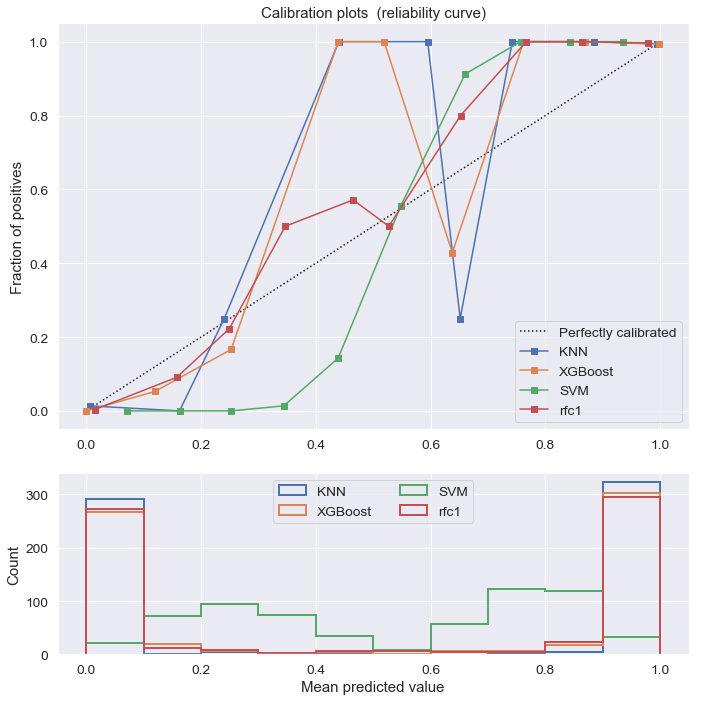

In [136]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
# Create classifiers
xg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)
knn =neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')
svm = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
rdmf = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')

# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(xg, 'KNN'),
                  (knn, 'XGBoost'),
                  (svm, 'SVM'),
                  (rdmf, 'rfc1')]:
    clf.fit(X_train, Y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(Y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

# Choice of features using ACP

In [137]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca.fit_transform(voice)
values=pca.explained_variance_ratio_
print(values)

[4.93386295e-01 2.04307697e-01 7.30650896e-02 5.76531034e-02
 4.13011225e-02 2.99939587e-02 2.16488872e-02 2.01866133e-02
 1.59277853e-02 1.18635519e-02 9.14197014e-03 6.73712074e-03
 5.61447781e-03 3.55036367e-03 3.15245066e-03 2.06638840e-03
 2.10369361e-04 1.92754694e-04 1.37768697e-30 2.45518668e-33
 4.07323072e-34]


In [138]:
# we choose the value 3 and more
cols = ['meanfreq','median','Q25','Q75','mode','centroid','meanfun','minfun','maxfun','meandom','dfrange','label']


In [139]:
y = voice[cols]
Train1, Test1 = train_test_split(y,test_size=0.2,random_state = 42)

In [140]:
X_train = Train1.iloc[:, :-1]
Y_train = Train1["label"]
X_test = Test1.iloc[:, :-1]
Y_test = Test1["label"]

In [141]:
knn_best_y = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance').fit(X_train,Y_train)
predictions_y = knn_best_y.predict(X_test)

accuracy_score(y_true = Y_test, y_pred = predictions_y)

0.9794952681388013

In [142]:
from sklearn.ensemble import RandomForestClassifier
rfc1_y=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='gini')
rfc1_y.fit(X_train, Y_train)
pred=rfc1_y.predict(X_test)

print("Random Forest Classification Score: ",rfc1_y.score(X_test,Y_test))

Random Forest Classification Score:  0.9779179810725552


In [143]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
best_xgb_y= xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)
xgb_fit_y=best_xgb_y.fit(X_train,Y_train)
predictions1 = xgb_fit_y.predict(X_test)

accuracy_score(y_true = Y_test, y_pred = predictions1)

0.9826498422712934

In [144]:
from sklearn.svm import SVC
best_SVM_y=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False).fit(X_train,Y_train)
svc_predict_y=best_SVM_y.predict(X_test)

accuracy_score(y_true = Y_test, y_pred = svc_predict_y)

0.9779179810725552

In [145]:
leaderboard2 = pd.DataFrame({'accuracy score test ':[knn_best_y.score(X_test,Y_test),best_SVM_y.score(X_test,Y_test),best_xgb_y.score(X_test,Y_test),rfc1_y.score(X_test,Y_test)],'accuracy score train':[knn_best_y.score(X_train,Y_train),best_SVM_y.score(X_train,Y_train),best_xgb_y.score(X_train,Y_train),rfc1_y.score(X_train,Y_train)]}, 
                            index = ['KNN regression', 'SVM regression','XGBoost regression','Random Forest'])
leaderboard2

,accuracy score test,accuracy score train
KNN regression,0.979495,1.000000
SVM regression,0.977918,0.981452
XGBoost regression,0.982650,0.997632
Random Forest,0.977918,0.994870


Cross validation

best_xgb_X: 0.976131 (0.027571)
knn_best_X: 0.972347 (0.027486)
best_SVM_X: 0.976337 (0.026500)
rfc1_X: 0.977540 (0.027032)


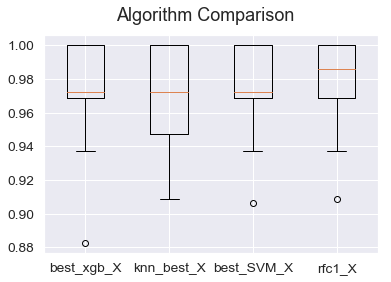

In [196]:

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# prepare models
models = []
models.append(('best_xgb_X', xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)))
models.append(('knn_best_X',  neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')))
models.append(('best_SVM_X', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)))
models.append(('rfc1_X', RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
   # kfold = model_selection.KFold(n_splits=10, random_state=None)
    #cv_results = model_selection.cross_val_score(model, x_Test,y_Test, cv=kfold, scoring=scoring)
    cv_results=cross_val_score(model, x_test,y_test, cv=20,scoring='precision_macro')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
   

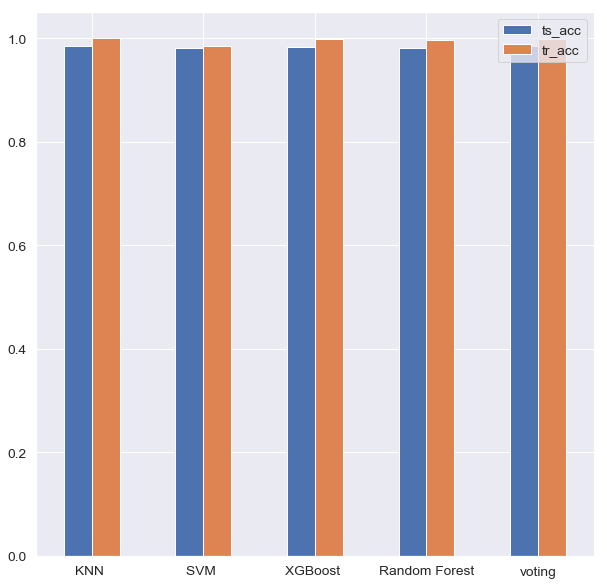

In [187]:
test_accuracy =[knn_best_X.score(x_Test,y_Test),best_SVM_X.score(x_Test,y_Test),best_xgb_X.score(x_Test,y_Test),rfc1_X.score(x_Test,y_Test),eclf1.score(x_Test,y_Test)]
train_accuracy = [knn_best_X.score(x_Train,y_Train),best_SVM_X.score(x_Train,y_Train),best_xgb_X.score(x_Train,y_Train),rfc1_X.score(x_Train,y_Train),eclf1.score(x_Train,y_Train)] 
index =['KNN ', 'SVM ','XGBoost ','Random Forest','voting']
df = pd.DataFrame({'ts_acc': test_accuracy,'tr_acc': train_accuracy}, index=index)
ax = df.plot.bar(rot=0,figsize=(10,10))